In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
Loans_data = pd.read_csv(r"C:\Users\ADMIN\Downloads\Basic Statistics - Hypothesis Testing (1)\LoansData.csv")
Loans_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [8]:
Loans_data.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [10]:
Loans_data.isnull().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [12]:
Loans_data.duplicated().sum()

0

In [13]:
Loans_data.nunique()

Amount.Requested                   380
Amount.Funded.By.Investors         710
Interest.Rate                      275
Loan.Length                          2
Loan.Purpose                        14
Debt.To.Income.Ratio              1669
State                               46
Home.Ownership                       5
Monthly.Income                     632
FICO.Range                          38
Open.CREDIT.Lines                   29
Revolving.CREDIT.Balance          2349
Inquiries.in.the.Last.6.Months      10
Employment.Length                   11
dtype: int64

In [14]:
Loans_data['Interest.Rate']=Loans_data['Interest.Rate'].str.replace('%','')
Loans_data['Interest.Rate']=Loans_data['Interest.Rate'].astype('float64')

In [15]:
Loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   float64
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [18]:
Loans_data.groupby("FICO.Range").count().head(10)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
FICO.Range,,,,,,,,,,,,,
640-644,5,5,5,5,5,5,5,5,5,5,5,5,5
645-649,3,3,3,3,3,3,3,3,3,3,3,3,3
650-654,1,1,1,1,1,1,1,1,1,1,1,1,1
655-659,4,4,4,4,4,4,4,4,4,4,4,4,4
660-664,124,125,124,125,125,125,125,125,125,125,125,125,119
665-669,145,145,145,145,145,145,145,145,145,145,145,145,138
670-674,171,171,171,171,171,171,171,171,171,170,171,171,168
675-679,166,166,166,166,166,166,166,166,166,166,166,166,161
680-684,157,157,157,157,157,157,157,157,157,157,157,157,157


In [19]:
Loans_data.groupby("Home.Ownership").count()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
Home.Ownership,,,,,,,,,,,,,
MORTGAGE,1147,1147,1146,1147,1147,1147,1147,1147,1146,1147,1146,1147,1112
NONE,1,1,1,1,1,1,1,0,1,0,0,0,1
OTHER,5,5,5,5,5,5,5,5,5,5,5,5,5
OWN,200,200,200,200,200,200,200,200,200,200,200,200,189
RENT,1145,1145,1145,1146,1146,1146,1146,1146,1145,1144,1145,1144,1115


In [21]:
Loans_data['Interest.Rate'].fillna(Loans_data['Interest.Rate'].mean(), inplace=True)
Loans_data['Amount.Requested'].fillna(Loans_data['Amount.Requested'].mean(), inplace=True)
Loans_data['Amount.Funded.By.Investors'].fillna(Loans_data['Amount.Funded.By.Investors'].mean(), inplace=True)
Loans_data['FICO.Range'].fillna('670-674', inplace=True)
Loans_data['Home.Ownership'].fillna('MORTGAGE', inplace=True)

## BUSINESS PROBLEM 1:
    Using lending club loans data, the team would like to test below hypothesis on how different
    factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)
    a. Interest rate is varied for different loan amounts (Less interest charged for high loan
    amounts)
    b. Loan length is directly effecting intrest rate.
    c. Interest rate varies for different purpose of loans
    d. There is relationship between FICO scores and Home Ownership. It means that, People
    with owning home will have high FICO scores.

#### a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)

Define null hypothesis - Ho:
Ho= Interest rate does not vary for different loan amounts.(Less interest is not charged for high loan amounts)

Define Alternate hypothesis - Ha:
Ha= Interest rate is varied for different loan amounts (Less interest charged for high loan amounts).

Define CI :
CI = 95% , pvalue =0.05

Perform test:
Co-Relations (Pearson Co-efficient) as we have to find out the relationship between 2 continuous variables


In [23]:
stats.pearsonr(Loans_data['Interest.Rate'],Loans_data['Amount.Requested'])

(0.33244640596656827, 1.4148683739824417e-65)

Business conclusion:
Initial p-value= 0.05
New p-value= 1.4148683739824417e-65

New p-value < Initial p-value , Hence we will REJECT Ho (Null Hypothesis) with 95% accuracy.

Therefore, Interest rate is varied for different loan amounts (Less interest charged for high loan amounts).

#### b. Loan length is directly effecting intrest rate.

Define null hypothesis - Ho: Ho= Loan length is not effecting intrest rate.

Step 2. Define Alternate hypothesis - Ha: Ha= Loan length is directly effecting intrest rate..

Define CI : CI = 95% , pvalue =0.05

Perform test: we will perform the T-Test for two independent variable.

In [34]:
Loans_data.groupby("Loan.Length").count()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
Loan.Length,,,,,,,,,,,,,
36 months,1952,1952,1952,1952,1951,1952,1952,1951,1952,1949,1949,1949,1886
60 months,548,548,548,548,548,548,548,548,548,548,548,548,537


In [29]:
A = Loans_data.loc[Loans_data["Loan.Length"]=='36 months','Interest.Rate' ]

In [30]:
B =Loans_data.loc[Loans_data["Loan.Length"]=='60 months','Interest.Rate' ]

In [31]:
stats.ttest_ind(A,B)

Ttest_indResult(statistic=-23.41049023613487, pvalue=9.549596064332559e-110)

New p  value = 9.549596064332559e-110
New p-value < Initial p-value. So, we will REJECT Ho.

Therefore, Loan length is directly effecting the interest rate.

#### c. Inrest rate varies for different purpose of loans

Define null hypothesis - Ho: Ho= Interest rate does not vary for different purpose of loans.

Define alternative hypothesis - Ha: Ha= Interest rate varies for different purpose of loans.

Define CI : CI = 95% , Initial p-value =0.05

Perform test: Co-Relations (Spearman's Rank) as we have to find the relationship between categorical and continuous variable.

In [37]:
stats.spearmanr(Loans_data['Loan.Purpose'],Loans_data['Interest.Rate'])

SpearmanrResult(correlation=-0.06035663579266386, pvalue=0.0025354766301471797)

Business conclusion:

Initial p-value= 0.05

New p-value= 0.0025354766301471797

since New p-value < Initial p-value , we will REJECT Ho.

Therefore, Interest rate varies for different purpose of loans.

#### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

Define null hypothesis - Ho: Ho= There is no relationship between FICO scores and Home Ownership.

Define alternative hypothesis - Ha: Ha= There is relationship between FICO scores and Home Ownership.

Define CI : CI = 95% , Initial p-value =0.05

Perform test: We have to determine the relationship between 2 categorical variables so we will perform Chi-Sq test.

In [38]:
Chi_Square=pd.crosstab( Loans_data['Home.Ownership'],Loans_data['FICO.Range'] )
Chi_Square

FICO.Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home.Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,68,79,55,61,...,21,12,15,7,7,6,5,6,0,1
NONE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,17,18,13,11,9,10,...,3,2,1,1,3,2,1,0,1,0
RENT,4,2,0,3,67,75,91,75,91,65,...,4,5,4,5,2,3,2,0,0,0


In [39]:
stats.chi2_contingency(Chi_Square)

(473.5648028168521,
 1.0065160858471904e-35,
 148,
 array([[2.29600e+00, 1.37760e+00, 4.59200e-01, 1.83680e+00, 5.74000e+01,
         6.65840e+01, 7.94416e+01, 7.62272e+01, 7.20944e+01, 6.24512e+01,
         6.42880e+01, 7.02576e+01, 6.01552e+01, 6.15328e+01, 5.14304e+01,
         4.27056e+01, 5.23488e+01, 4.31648e+01, 4.31648e+01, 2.98480e+01,
         2.43376e+01, 2.47968e+01, 2.80112e+01, 2.11232e+01, 2.11232e+01,
         1.65312e+01, 7.80640e+00, 1.01024e+01, 1.28576e+01, 8.72480e+00,
         9.18400e+00, 5.96960e+00, 5.96960e+00, 5.05120e+00, 3.67360e+00,
         2.75520e+00, 4.59200e-01, 4.59200e-01],
        [2.00000e-03, 1.20000e-03, 4.00000e-04, 1.60000e-03, 5.00000e-02,
         5.80000e-02, 6.92000e-02, 6.64000e-02, 6.28000e-02, 5.44000e-02,
         5.60000e-02, 6.12000e-02, 5.24000e-02, 5.36000e-02, 4.48000e-02,
         3.72000e-02, 4.56000e-02, 3.76000e-02, 3.76000e-02, 2.60000e-02,
         2.12000e-02, 2.16000e-02, 2.44000e-02, 1.84000e-02, 1.84000e-02,
         1.4

Business conclusion:

Initial p-value= 0.05, New p-value= 1.0065160858471904e-35

New p-value < initial p-value , So we will REJECT Ho.

Therefore,we can say that there is relationship between FICO scores and Home Ownership with 95% accuracy.

###  BUSINESS PROBLEM 2:
We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

DATA AVAILABLE:
Price_Quotes.csv

The data set contains the order number, 1 through 12, and the price quotes by Mary and Barry for each order. Each row in the  data set is the same order. Thus, Mary and Barry produced quotes for the same orders.

In [41]:
Price_quotes = pd.read_csv(r"C:\Users\ADMIN\Downloads\Basic Statistics - Hypothesis Testing (1)\Price_Quotes.csv")
Price_quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [42]:
Price_quotes.isna().sum()

Order_Number    0
Barry_Price     0
Mary_Price      0
dtype: int64

In [43]:
Price_quotes.duplicated().sum()

0

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Barry_Price'>

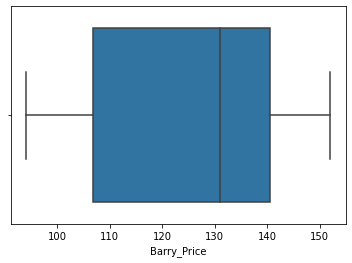

In [45]:
sns.boxplot(Price_quotes.Barry_Price)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mary_Price'>

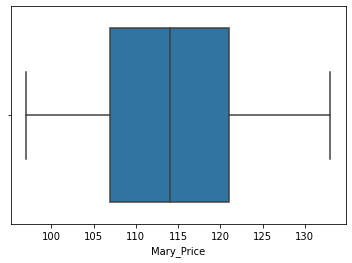

In [46]:
sns.boxplot(Price_quotes.Mary_Price)

Define null hypothesis - Ho: Ho= there is no difference in the avg price quotes provided by Mary and Barry.

Define Alternative hypothesis - Ha: Ha= there is difference in the avg price quotes provided by Mary and Barry.

Define CI : CI = 95% , Initial p-value =0.05

Perform test: T-Test -- we are considering sample size of 12

In [48]:
stats.ttest_rel(Price_quotes.Barry_Price,Price_quotes.Mary_Price)

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

Business Conclusion:

Initial p-value= 0.05 New p-value= 0.0284

since New p-value < Initial p-value , we will REJECT Ho.

Therefore, there is difference between the average price quotes provided by Mary and Barry.

### BUSINESS PROBLEM-3:

 Determine what effect, if any, the reengineering effort had on the
incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
changed the critical incidence rate. Is there evidence that the critical incidence rate
improved?

In [57]:
Treatment_Facility=pd.read_csv(r"C:\Users\ADMIN\Downloads\Basic Statistics - Hypothesis Testing (1)\Treatment_Facility.csv")
Treatment_Facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [58]:
Treatment_Facility.rename(columns = {'VAR4':'TRFF','VAR5':'CI'},inplace = True)

In [60]:
Treatment_Facility.head(2)

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452


In [62]:
Treatment_Facility.describe()

,Month,Employee_Turnover,TRFF,CI
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,14.169395,16.582433,43.199541
std,5.91608,8.836302,10.088265,41.715909
min,1.00000,0.000000,4.201681,0.000000
25%,5.75000,9.919350,9.596368,20.731427
50%,10.50000,12.470850,14.998702,25.669183
75%,15.25000,19.230750,19.807134,43.776901
max,20.00000,30.769200,41.176471,146.198830


#### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

Define null hypothesis - Ho: Ho= there is no effect post the reengineer

Define null hypothesis - Ha: Ha= there is effect post the reengineer

Define CI : CI = 95% , pvalue =0.05

Perform test: we will perform the T-Test (as we have to find relation between 1 continuous and 1 categorical variable)

In [66]:
Prior= Treatment_Facility[Treatment_Facility.Reengineer== 'Prior']['CI']
Prior

0      42.682927
1      25.806452
2     146.198830
3     110.429448
4      23.952096
5      47.058824
6       0.000000
7      25.000000
8     132.183908
9      16.574586
10     88.757396
11     31.746032
12     10.152284
Name: CI, dtype: float64

In [67]:
Post= Treatment_Facility[Treatment_Facility.Reengineer== 'Post']['CI']
Post

13    29.126214
14    21.008403
15    34.782609
16    19.900498
17     9.950249
18    25.531915
19    23.148148
Name: CI, dtype: float64

In [68]:
stats.ttest_ind(Prior,Post)

Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

Business conclusion:

Initial p-value= 0.05 New p-value= 0.12091989189884149

since New p-value > Initial p-value , we will ACCEPT Ho.

From the above observation it can't be proved if the reengineering effort changed the critical incidence rate.`

### BUSINESS PROBLEM-4:

We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring`

In [71]:
Priority_Assessment = pd.read_csv(r"C:\Users\ADMIN\Downloads\Basic Statistics - Hypothesis Testing (1)\Priority_Assessment.csv")

In [72]:
Priority_Assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [74]:
Priority_Assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [75]:
Priority_Assessment.groupby('Priority').Days.sum()

Priority
High      985.7
Low       283.3
Medium    622.5
Name: Days, dtype: float64

In [76]:
Priority_Assessment.Priority.value_counts()

High      326
Medium    249
Low        67
Name: Priority, dtype: int64

Define null hypothesis - Ho: H0 = The new system is not working

Define null hypothesis - Ha: Ha = The new system is working

Define CI : CI - 95% p - 0.05

Perform test: F-TEST | ANOVA

In [81]:
A1= Priority_Assessment[Priority_Assessment.Priority=='High'].Days
A2= Priority_Assessment[Priority_Assessment.Priority=='Medium'].Days
A3= Priority_Assessment[Priority_Assessment.Priority=='Low'].Days

In [82]:
stats.f_oneway(A1,A2,A3)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

Business Conclusion : 
New pvalue=0.16411459461716182

Initial p-value < New p-value, So we'll ACCEPT Ho.

From the above observation it can be said that the new system is not working.

### BUSINESS PROBLEM-5:

In [86]:
Films = pd.read_csv(r"C:\Users\ADMIN\Downloads\Basic Statistics - Hypothesis Testing (1)\Films.csv")
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


Use the survey results to address the following questions

1.What is the overall level of customer satisfaction?

2.What factors are linked to satisfaction?

3.What is the demographic profile of Film on the Rocks patrons?

4.In what media outlet(s) should the film series be advertised?


In [87]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [88]:
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [90]:
Films.duplicated().sum()

46

NOTE:
Gender- The patron’s gender: 1 = male; 2 = female

Marital Status- The patron’s marital status: 1 = married; 2 = single

Age- The patron’s age in years: 1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+

Income- The patron’s annual household income: 1 = Less than $50,000; 2 = $50-$100,000; 3 = $100,000+

1 = Excellent; 2 = Good; 3 = Average/Fair; 4 = Poor; 5 = Very Poor.

In [91]:
Films.replace('Slngle','Single', inplace=True)

In [93]:
Films.Gender.replace({'1':'Male', '2':'Female' }, inplace=True)

Films.Marital_Status.replace({'1': 'Married', '2':'Single'}, inplace=True)

In [94]:
Films.groupby("Marital_Status").Gender.count()

Marital_Status
Married    100
Single     228
Name: Gender, dtype: int64

In [95]:
Films.drop_duplicates(inplace=True)

In [103]:
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


#### 1.What is the overall level of customer satisfaction?
    observation: The overall level of Customer satisfaction was Good(268) and Excellent(131).

In [96]:
Films.groupby("Overall").Overall.sum().sort_values(ascending= False)

Overall
2.0    264.0
1.0    128.0
3.0     36.0
5.0     20.0
4.0      4.0
Name: Overall, dtype: float64

<AxesSubplot:xlabel='Overall', ylabel='Count'>

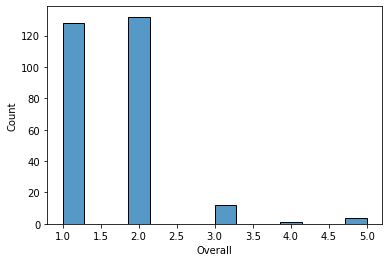

In [97]:
sns.histplot(Films.Overall)

### 2.What factors are linked to satisfaction?¶

Define null hypothesis - Ho: Ho= There is no relationship between overall and other factors.

Define alternative hypothesis - Ha: Ha= There is a relationship between overall and other factors..

Define CI : CI = 95% , Initial p-value =0.05

Perform test: Chi-Sq test.

In [101]:
Observed1 =pd.crosstab(index=Films.Overall,columns=(Films.Parking))
Observed1
stats.chi2_contingency(Observed1)

(175.1310290555826,
 7.950772886000052e-29,
 16,
 array([[5.10144928e+01, 5.88985507e+01, 1.29855072e+01, 3.24637681e+00,
         1.85507246e+00],
        [5.22101449e+01, 6.02789855e+01, 1.32898551e+01, 3.32246377e+00,
         1.89855072e+00],
        [4.78260870e+00, 5.52173913e+00, 1.21739130e+00, 3.04347826e-01,
         1.73913043e-01],
        [3.98550725e-01, 4.60144928e-01, 1.01449275e-01, 2.53623188e-02,
         1.44927536e-02],
        [1.59420290e+00, 1.84057971e+00, 4.05797101e-01, 1.01449275e-01,
         5.79710145e-02]]))

Since, Initial p-value(0.05) > New p-value(7.950772886000052e-29)

Therefore, we'll REJECT Ho.

So we can say that there is a relationship between OVERALL AND PARKING

In [100]:
Observed2 =pd.crosstab(index=Films.Overall,columns=(Films.Sinage))
Observed2
stats.chi2_contingency(Observed2)

(91.95404780514889,
 1.0905192443500657e-12,
 16,
 array([[4.09528986e+01, 6.07391304e+01, 2.02463768e+01, 2.76086957e+00,
         2.30072464e+00],
        [4.25652174e+01, 6.31304348e+01, 2.10434783e+01, 2.86956522e+00,
         2.39130435e+00],
        [3.86956522e+00, 5.73913043e+00, 1.91304348e+00, 2.60869565e-01,
         2.17391304e-01],
        [3.22463768e-01, 4.78260870e-01, 1.59420290e-01, 2.17391304e-02,
         1.81159420e-02],
        [1.28985507e+00, 1.91304348e+00, 6.37681159e-01, 8.69565217e-02,
         7.24637681e-02]]))

Since, Initial p-value(0.05) > New p-value(1.0905192443500657e-12)

Therefore, we'll REJECT Ho.

So we can say that there is a relationship between OVERALL AND SINAGE.

In [104]:
Observed3 =pd.crosstab(index=Films.Overall,columns=(Films.Clean))
Observed3
stats.chi2_contingency(Observed3)

(88.6676504071631,
 4.399087983774725e-12,
 16,
 array([[5.51884058e+01, 5.93623188e+01, 1.06666667e+01, 1.85507246e+00,
         9.27536232e-01],
        [5.64818841e+01, 6.07536232e+01, 1.09166667e+01, 1.89855072e+00,
         9.49275362e-01],
        [5.17391304e+00, 5.56521739e+00, 1.00000000e+00, 1.73913043e-01,
         8.69565217e-02],
        [4.31159420e-01, 4.63768116e-01, 8.33333333e-02, 1.44927536e-02,
         7.24637681e-03],
        [1.72463768e+00, 1.85507246e+00, 3.33333333e-01, 5.79710145e-02,
         2.89855072e-02]]))

Since, Initial p-value(0.05) > New p-value( 4.399087983774725e-12)

Therefore, we'll REJECT Ho.

So we can say that there is a relationship between OVERALL AND CLEAN.

From the above 3 results it is observed that using Chi_square--there is a strong relationship between OVERALL and ALL OF THEM (PARKING, CLEAN, SINAGE), which is affecting the overall satisfaction level.

#### 3. What is the demographic profile of Film on the Rocks patrons?

In [105]:
Films.groupby("Gender").Overall.count().sort_values(ascending=False)

Gender
Female    175
Male      102
Name: Overall, dtype: int64

In [106]:
Female_Percentage=(177/(177+105))*100
print(Female_Percentage)

62.76595744680851


In [107]:
Films.groupby("Marital_Status").Overall.count().sort_values(ascending=False)

Marital_Status
Single     188
Married     87
Name: Overall, dtype: int64

In [108]:
Single_Percentage= (191/(191+89))*100
print(Single_Percentage)

68.21428571428572


In [109]:
# The patron’s age in years: 1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+
Films.groupby("Age").Overall.count().sort_values(ascending=False)

Age
2.0    140
3.0    103
1.0     22
4.0     10
Name: Overall, dtype: int64

In [110]:
# The patron’s annual household income: 1 = Less than $50,000; 2 = $50- $100,000; 3 = $100,000+
Films.groupby("Income").Overall.count().sort_values(ascending=False)

Income
1.0    114
3.0     76
2.0     74
Name: Overall, dtype: int64

The demographic profile of Film on the Rocks patrons are:
1. There are 62.7% of FEMALES profiles of Film on the Rocks patrons

2. There are 68.2% of SINGLE profiles of Film on the Rocks patrons

3. Most people are from Age group 2.0 i.e.(13-30) in the profiles of Film on the Rocks patrons

4. Most people have income group of 1.0 i.e.(>50,000) in the profiles of Film on the Rocks patrons

### 4.In what media outlet(s) should the film series be advertised?

In [111]:
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [112]:
# 1 = television; 2 = newspaper; 3 = radio; 4 = website; 5 = word of mouth

In [115]:
Films.groupby("Hear_About")['Hear_About'].count()

Hear_About
1       22
1,5      1
2       12
2,5      2
3       12
3,4      2
3,5      1
4       38
4,5      1
5      180
5,4      1
Name: Hear_About, dtype: int64

In [117]:
Films.Hear_About.replace({'1,5':'5','2,5':'5', '3,4':'5','3,5':'5', '4,5':'5','5,4':'5'}, inplace=True)

In [118]:
Films.Hear_About=Films.Hear_About.astype("float64")

In [119]:
Films.groupby("Hear_About").Hear_About.count().sort_values(ascending= False)

Hear_About
5.0    188
4.0     38
1.0     22
2.0     12
3.0     12
Name: Hear_About, dtype: int64

<AxesSubplot:xlabel='Hear_About', ylabel='Count'>

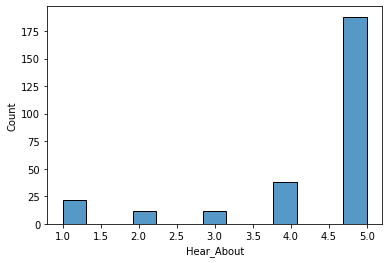

In [120]:
sns.histplot(Films.Hear_About)

##### 1 = television; 2 = newspaper; 3 = radio; 4 = website; 5 = word of mouth

Conclusion: Word of mouth as 5.0 is highest one but it does not come under media outlet

So, we will go with the second one which is 4.0 i.e. WEBSITE

Therefore, film series should be advertised mainly through WEBSITE media outlet.